In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\hp\Downloads\netflix.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [3]:

len(df)

8807

In [4]:
df.shape

(8807, 12)

In [5]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
for i in df.columns:
    print(i,':',df[i].nunique())

show_id : 8807
type : 2
title : 8807
director : 4528
cast : 7692
country : 748
date_added : 1767
release_year : 74
rating : 17
duration : 220
listed_in : 514
description : 8775


In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [9]:
#unnesting directors column
constraint1=df['director'].apply(lambda x: str(x).split(', ')).tolist()
constraint1


[['Kirsten Johnson'],
 ['nan'],
 ['Julien Leclercq'],
 ['nan'],
 ['nan'],
 ['Mike Flanagan'],
 ['Robert Cullen', 'José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['nan'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['nan'],
 ['nan'],
 ['Pedro de Echave García', 'Pablo Azorín Williams'],
 ['nan'],
 ['Adam Salky'],
 ['nan'],
 ['Olivier Megaton'],
 ['nan'],
 ['K.S. Ravikumar'],
 ['Alex Woo', 'Stanley Moore'],
 ['S. Shankar'],
 ['nan'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic'],
 ['Ashwiny Iyer Tiwari', 'Abhishek Chaubey', 'Saket Chaudhary'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Daniel Sandu'],
 ['Cédric Jimenez'],
 ['nan'],
 ['George Nolfi'],
 ['nan'],
 ['nan'],
 ['Steven Spielberg'],
 ['Jeannot Szwarc'],
 ['Joe Alves'],
 ['Joseph Sargent'],
 ['Tyler Greco'],
 ['Daniel Espinosa'],
 ['Bunmi Ajakaiye'],
 ['Antoine Fuqua'],
 ['nan'],
 ['nan'],
 ['Toshiya Shinohara'],
 ['Toshiya Shinohara'],
 

In [10]:
df_new1=pd.DataFrame(constraint1,index=df['title'])
df_new1


,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Dick Johnson Is Dead,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,nan,None,None,None,None,None,None,None,None,None,None,None,None
Ganglands,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,nan,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,David Fincher,None,None,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,None,None,None
Zombieland,Ruben Fleischer,None,None,None,None,None,None,None,None,None,None,None,None


In [11]:
df_new1=df_new1.stack()
df_new1


title                   
Dick Johnson Is Dead   0    Kirsten Johnson
Blood & Water          0                nan
Ganglands              0    Julien Leclercq
Jailbirds New Orleans  0                nan
Kota Factory           0                nan
                                 ...       
Zodiac                 0      David Fincher
Zombie Dumb            0                nan
Zombieland             0    Ruben Fleischer
Zoom                   0       Peter Hewitt
Zubaan                 0        Mozez Singh
Length: 9612, dtype: object

In [12]:
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1


,title,level_1,0
0,Dick Johnson Is Dead,0,Kirsten Johnson
1,Blood & Water,0,nan
2,Ganglands,0,Julien Leclercq
3,Jailbirds New Orleans,0,nan
4,Kota Factory,0,nan
...,...,...,...
9607,Zodiac,0,David Fincher
9608,Zombie Dumb,0,nan
9609,Zombieland,0,Ruben Fleischer
9610,Zoom,0,Peter Hewitt


In [13]:
df_new1.rename(columns={0:'Directors'},inplace=True)
df_new1


,title,level_1,Directors
0,Dick Johnson Is Dead,0,Kirsten Johnson
1,Blood & Water,0,nan
2,Ganglands,0,Julien Leclercq
3,Jailbirds New Orleans,0,nan
4,Kota Factory,0,nan
...,...,...,...
9607,Zodiac,0,David Fincher
9608,Zombie Dumb,0,nan
9609,Zombieland,0,Ruben Fleischer
9610,Zoom,0,Peter Hewitt


In [14]:
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,nan
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,nan
4,Kota Factory,nan
...,...,...
9607,Zodiac,David Fincher
9608,Zombie Dumb,nan
9609,Zombieland,Ruben Fleischer
9610,Zoom,Peter Hewitt


In [15]:
#unnesting the cast column, i.e- creating separate lines for each cast member in a movie
constraint2=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
constraint2


[['nan'],
 ['Ama Qamata',
  'Khosi Ngema',
  'Gail Mabalane',
  'Thabang Molaba',
  'Dillon Windvogel',
  'Natasha Thahane',
  'Arno Greeff',
  'Xolile Tshabalala',
  'Getmore Sithole',
  'Cindy Mahlangu',
  'Ryle De Morny',
  'Greteli Fincham',
  'Sello Maake Ka-Ncube',
  'Odwa Gwanya',
  'Mekaila Mathys',
  'Sandi Schultz',
  'Duane Williams',
  'Shamilla Miller',
  'Patrick Mofokeng'],
 ['Sami Bouajila',
  'Tracy Gotoas',
  'Samuel Jouy',
  'Nabiha Akkari',
  'Sofia Lesaffre',
  'Salim Kechiouche',
  'Noureddine Farihi',
  'Geert Van Rampelberg',
  'Bakary Diombera'],
 ['nan'],
 ['Mayur More',
  'Jitendra Kumar',
  'Ranjan Raj',
  'Alam Khan',
  'Ahsaas Channa',
  'Revathi Pillai',
  'Urvi Singh',
  'Arun Kumar'],
 ['Kate Siegel',
  'Zach Gilford',
  'Hamish Linklater',
  'Henry Thomas',
  'Kristin Lehman',
  'Samantha Sloyan',
  'Igby Rigney',
  'Rahul Kohli',
  'Annarah Cymone',
  'Annabeth Gish',
  'Alex Essoe',
  'Rahul Abburi',
  'Matt Biedel',
  'Michael Trucco',
  'Crystal Ba

In [16]:
df_new2=pd.DataFrame(constraint2,index=df['title'])
df_new2


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
title,,,,,,,,,,,,,,,,,,,,,
Dick Johnson Is Dead,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Blood & Water,Ama Qamata,Khosi Ngema,Gail Mabalane,Thabang Molaba,Dillon Windvogel,Natasha Thahane,Arno Greeff,Xolile Tshabalala,Getmore Sithole,Cindy Mahlangu,...,None,None,None,None,None,None,None,None,None,None
Ganglands,Sami Bouajila,Tracy Gotoas,Samuel Jouy,Nabiha Akkari,Sofia Lesaffre,Salim Kechiouche,Noureddine Farihi,Geert Van Rampelberg,Bakary Diombera,None,...,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Kota Factory,Mayur More,Jitendra Kumar,Ranjan Raj,Alam Khan,Ahsaas Channa,Revathi Pillai,Urvi Singh,Arun Kumar,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,Mark Ruffalo,Jake Gyllenhaal,Robert Downey Jr.,Anthony Edwards,Brian Cox,Elias Koteas,Donal Logue,John Carroll Lynch,Dermot Mulroney,Chloë Sevigny,...,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
Zombieland,Jesse Eisenberg,Woody Harrelson,Emma Stone,Abigail Breslin,Amber Heard,Bill Murray,Derek Graf,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [17]:
df_new2=df_new2.stack()
df_new2


title                  
Dick Johnson Is Dead  0                      nan
Blood & Water         0               Ama Qamata
                      1              Khosi Ngema
                      2            Gail Mabalane
                      3           Thabang Molaba
                                   ...          
Zubaan                3         Manish Chaudhary
                      4             Meghna Malik
                      5            Malkeet Rauni
                      6           Anita Shabdish
                      7    Chittaranjan Tripathy
Length: 64951, dtype: object

In [18]:
df_new2=pd.DataFrame(df_new2.reset_index())
df_new2


,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
64946,Zubaan,3,Manish Chaudhary
64947,Zubaan,4,Meghna Malik
64948,Zubaan,5,Malkeet Rauni
64949,Zubaan,6,Anita Shabdish


In [19]:
df_new2.rename(columns={0:'Actors'},inplace=True)
df_new2


,title,level_1,Actors
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
64946,Zubaan,3,Manish Chaudhary
64947,Zubaan,4,Meghna Malik
64948,Zubaan,5,Malkeet Rauni
64949,Zubaan,6,Anita Shabdish


In [20]:
df_new2.drop(['level_1'],axis=1,inplace=True)
df_new2

,title,Actors
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


In [21]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [22]:
constraint3=df['listed_in'].apply(lambda x:str(x).split(',')).to_list()
constraint3

[['Documentaries'],
 ['International TV Shows', ' TV Dramas', ' TV Mysteries'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Docuseries', ' Reality TV'],
 ['International TV Shows', ' Romantic TV Shows', ' TV Comedies'],
 ['TV Dramas', ' TV Horror', ' TV Mysteries'],
 ['Children & Family Movies'],
 ['Dramas', ' Independent Movies', ' International Movies'],
 ['British TV Shows', ' Reality TV'],
 ['Comedies', ' Dramas'],
 ['Crime TV Shows', ' Docuseries', ' International TV Shows'],
 ['Crime TV Shows', ' International TV Shows', ' TV Action & Adventure'],
 ['Dramas', ' International Movies'],
 ['Children & Family Movies', ' Comedies'],
 ['British TV Shows', ' Crime TV Shows', ' Docuseries'],
 ['TV Comedies', ' TV Dramas'],
 ['Documentaries', ' International Movies'],
 ['Crime TV Shows', ' Spanish-Language TV Shows', ' TV Dramas'],
 ['Thrillers'],
 ['International TV Shows',
  ' Spanish-Language TV Shows',
  ' TV Action & Adventure'],
 ['Crime TV Shows', '

In [23]:
df_new3=pd.DataFrame(constraint3,index=df['title'])
df_new3

,0,1,2
title,,,
Dick Johnson Is Dead,Documentaries,None,None
Blood & Water,International TV Shows,TV Dramas,TV Mysteries
Ganglands,Crime TV Shows,International TV Shows,TV Action & Adventure
Jailbirds New Orleans,Docuseries,Reality TV,None
Kota Factory,International TV Shows,Romantic TV Shows,TV Comedies
...,...,...,...
Zodiac,Cult Movies,Dramas,Thrillers
Zombie Dumb,Kids' TV,Korean TV Shows,TV Comedies
Zombieland,Comedies,Horror Movies,None


In [24]:
df_new3=df_new3.stack()
df_new3

title                  
Dick Johnson Is Dead  0               Documentaries
Blood & Water         0      International TV Shows
                      1                   TV Dramas
                      2                TV Mysteries
Ganglands             0              Crime TV Shows
                                     ...           
Zoom                  0    Children & Family Movies
                      1                    Comedies
Zubaan                0                      Dramas
                      1        International Movies
                      2            Music & Musicals
Length: 19323, dtype: object

In [25]:
df_new3=pd.DataFrame(df_new3.reset_index())
df_new3

,title,level_1,0
0,Dick Johnson Is Dead,0,Documentaries
1,Blood & Water,0,International TV Shows
2,Blood & Water,1,TV Dramas
3,Blood & Water,2,TV Mysteries
4,Ganglands,0,Crime TV Shows
...,...,...,...
19318,Zoom,0,Children & Family Movies
19319,Zoom,1,Comedies
19320,Zubaan,0,Dramas
19321,Zubaan,1,International Movies


In [26]:
df_new3.rename(columns={0:'Genre'},inplace=True)
df_new3

,title,level_1,Genre
0,Dick Johnson Is Dead,0,Documentaries
1,Blood & Water,0,International TV Shows
2,Blood & Water,1,TV Dramas
3,Blood & Water,2,TV Mysteries
4,Ganglands,0,Crime TV Shows
...,...,...,...
19318,Zoom,0,Children & Family Movies
19319,Zoom,1,Comedies
19320,Zubaan,0,Dramas
19321,Zubaan,1,International Movies


In [27]:
df_new3.drop(['level_1'],axis=1,inplace=True)
df_new3

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19318,Zoom,Children & Family Movies
19319,Zoom,Comedies
19320,Zubaan,Dramas
19321,Zubaan,International Movies


In [28]:
#unnesting the country column
constraint4=df['country'].apply(lambda x:str(x).split(',')).tolist()
constraint4


[['United States'],
 ['South Africa'],
 ['nan'],
 ['nan'],
 ['India'],
 ['nan'],
 ['nan'],
 ['United States',
  ' Ghana',
  ' Burkina Faso',
  ' United Kingdom',
  ' Germany',
  ' Ethiopia'],
 ['United Kingdom'],
 ['United States'],
 ['nan'],
 ['nan'],
 ['Germany', ' Czech Republic'],
 ['nan'],
 ['nan'],
 ['United States'],
 ['nan'],
 ['Mexico'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Turkey'],
 ['nan'],
 ['nan'],
 ['India'],
 ['Australia'],
 ['nan'],
 ['United States'],
 ['United States'],
 ['United States', ' India', ' France'],
 ['nan'],
 ['nan'],
 ['United Kingdom'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['nan'],
 ['Finland'],
 ['China', ' Canada', ' United States'],
 ['India'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['nan'],
 ['South Africa', ' United States', ' Japan'],
 ['nan'],
 ['United States'],
 ['Nigeria'],
 ['India'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['United States'],
 ['Japan'],
 ['Japan'],
 ['Japan'],
 ['J

In [29]:
df_new4=pd.DataFrame(constraint4,index=df['title'])
df_new4


,0,1,2,3,4,5,6,7,8,9,10,11
title,,,,,,,,,,,,
Dick Johnson Is Dead,United States,None,None,None,None,None,None,None,None,None,None,None
Blood & Water,South Africa,None,None,None,None,None,None,None,None,None,None,None
Ganglands,nan,None,None,None,None,None,None,None,None,None,None,None
Jailbirds New Orleans,nan,None,None,None,None,None,None,None,None,None,None,None
Kota Factory,India,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...
Zodiac,United States,None,None,None,None,None,None,None,None,None,None,None
Zombie Dumb,nan,None,None,None,None,None,None,None,None,None,None,None
Zombieland,United States,None,None,None,None,None,None,None,None,None,None,None


In [30]:
df_new4=df_new4.stack()
df_new4


title                   
Dick Johnson Is Dead   0    United States
Blood & Water          0     South Africa
Ganglands              0              nan
Jailbirds New Orleans  0              nan
Kota Factory           0            India
                                ...      
Zodiac                 0    United States
Zombie Dumb            0              nan
Zombieland             0    United States
Zoom                   0    United States
Zubaan                 0            India
Length: 10850, dtype: object

In [31]:
df_new4=pd.DataFrame(df_new4.reset_index())
df_new4


,title,level_1,0
0,Dick Johnson Is Dead,0,United States
1,Blood & Water,0,South Africa
2,Ganglands,0,nan
3,Jailbirds New Orleans,0,nan
4,Kota Factory,0,India
...,...,...,...
10845,Zodiac,0,United States
10846,Zombie Dumb,0,nan
10847,Zombieland,0,United States
10848,Zoom,0,United States


In [32]:
df_new4.rename(columns={0 :'country'},inplace=True)
df_new4


,title,level_1,country
0,Dick Johnson Is Dead,0,United States
1,Blood & Water,0,South Africa
2,Ganglands,0,nan
3,Jailbirds New Orleans,0,nan
4,Kota Factory,0,India
...,...,...,...
10845,Zodiac,0,United States
10846,Zombie Dumb,0,nan
10847,Zombieland,0,United States
10848,Zoom,0,United States


In [33]:
df_new4.drop(['level_1'],axis=1,inplace=True)
df_new4

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,nan
3,Jailbirds New Orleans,nan
4,Kota Factory,India
...,...,...
10845,Zodiac,United States
10846,Zombie Dumb,nan
10847,Zombieland,United States
10848,Zoom,United States


In [34]:
df_new5=df_new2.merge(df_new1,on=['title'],how='inner')
df_new5

,title,Actors,Directors
0,Dick Johnson Is Dead,nan,Kirsten Johnson
1,Blood & Water,Ama Qamata,nan
2,Blood & Water,Khosi Ngema,nan
3,Blood & Water,Gail Mabalane,nan
4,Blood & Water,Thabang Molaba,nan
...,...,...,...
70807,Zubaan,Manish Chaudhary,Mozez Singh
70808,Zubaan,Meghna Malik,Mozez Singh
70809,Zubaan,Malkeet Rauni,Mozez Singh
70810,Zubaan,Anita Shabdish,Mozez Singh


In [35]:
df_new6=df_new5.merge(df_new3,on=['title'],how='inner')
df_new6

,title,Actors,Directors,Genre
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries
1,Blood & Water,Ama Qamata,nan,International TV Shows
2,Blood & Water,Ama Qamata,nan,TV Dramas
3,Blood & Water,Ama Qamata,nan,TV Mysteries
4,Blood & Water,Khosi Ngema,nan,International TV Shows
...,...,...,...,...
161211,Zubaan,Anita Shabdish,Mozez Singh,International Movies
161212,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals
161213,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas
161214,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies


In [36]:
df_new=df_new6.merge(df_new4,on=['title'],how='inner')
df_new

,title,Actors,Directors,Genre,country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,nan,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,nan,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,nan,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,nan,International TV Shows,South Africa
...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India


In [37]:
df_new['Directors'].replace(['nan'],['No_Director'],inplace=True)
df_new

,title,Actors,Directors,Genre,country
0,Dick Johnson Is Dead,nan,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa
...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India


In [38]:
df_new[df_new['Directors']=='No_Director']

,title,Actors,Directors,Genre,country
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa
5,Blood & Water,Khosi Ngema,No_Director,TV Dramas,South Africa
...,...,...,...,...,...
201938,Zindagi Gulzar Hai,Hina Khawaja Bayat,No_Director,Romantic TV Shows,Pakistan
201939,Zindagi Gulzar Hai,Hina Khawaja Bayat,No_Director,TV Dramas,Pakistan
202006,Zombie Dumb,nan,No_Director,Kids' TV,nan
202007,Zombie Dumb,nan,No_Director,Korean TV Shows,nan


In [39]:
df_new['Actors'].replace(['nan'],['Unknown Actor'],inplace=True)
df_new['country'].replace(['nan'],[np.nan],inplace=True)


In [40]:
df_new

,title,Actors,Directors,Genre,country
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa
...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India


In [41]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [42]:
df_final=df_new.merge(df[['show_id', 'type', 'title', 'date_added',
       'release_year', 'rating', 'duration']],how='inner',on=['title'])
df_final

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [43]:
#checking nulls
df_final.isnull().sum()

title               0
Actors              0
Directors           0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            3
dtype: int64

In [44]:
#In duration column, it was observed that the nulls had values which were written in corresponding ratings column, i.e
#you can't expect ratings to be in min. So the duration column nulls are replaced by corresponding values in ratings column
df_final['rating'].value_counts()


TV-MA       73915
TV-14       43957
R           25860
PG-13       16246
TV-PG       14926
PG          10919
TV-Y7        6304
TV-Y         3665
TV-G         2779
NR           1573
G            1530
NC-17         149
TV-Y7-FV       86
UR             86
74 min          1
84 min          1
66 min          1
Name: rating, dtype: int64

In [45]:
df_final.loc[df_final['duration'].isnull()]

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,74 min,NaN
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,84 min,NaN
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,66 min,NaN


In [46]:
df_final['duration'].fillna(df_final['rating'],inplace=True)
df_final

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [47]:
df_final['duration'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
202060    False
202061    False
202062    False
202063    False
202064    False
Name: duration, Length: 202065, dtype: bool

In [48]:
df_final.loc[df_final['Directors']=='Louis C.K.']

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,74 min,74 min
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,84 min,84 min
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,66 min,66 min


In [49]:
#df_final.loc[df_final['duration'].isnull(),'duration']=df_final.loc[df_final['duration'].isnull(),'duration'].fillna(df_final['rating'])

In [50]:
df_final.isnull().sum()

title               0
Actors              0
Directors           0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating             67
duration            0
dtype: int64

In [51]:
df_final.loc[df_final['Directors']=='Louis C.K.']

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,74 min,74 min
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,84 min,84 min
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,66 min,66 min


In [52]:
df_final.loc[df_final['rating'].str.contains('min',na=False)]
#Masking is not possible if there in nans in a column without #na=False

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,74 min,74 min
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,84 min,84 min
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,66 min,66 min


In [53]:
#ratings cant be in minutes so making it NR(i.e not rated)
df_final.loc[df_final['rating'].str.contains('min',na=False),'rating']='NR'

In [54]:
df_final.loc[df_final['Directors']=='Louis C.K.']

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,NR,74 min
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,NR,84 min
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,NR,66 min


In [55]:
df_final['rating'].fillna('NR',inplace=True)
df_final

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [56]:
df_final.loc[df_final['Directors']=='Louis C.K.']

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
126582,Louis C.K. 2017,Louis C.K.,Louis C.K.,Movies,United States,s5542,Movie,"April 4, 2017",2017,NR,74 min
131648,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,Movies,United States,s5795,Movie,"September 16, 2016",2010,NR,84 min
131782,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,Movies,United States,s5814,Movie,"August 15, 2016",2015,NR,66 min


In [57]:
df_final.isnull().sum()

title               0
Actors              0
Directors           0
Genre               0
country         11897
show_id             0
type                0
date_added        158
release_year        0
rating              0
duration            0
dtype: int64

#date added column is imputed on the basis of release year,i.e- suppose there's a null for date_added 
when release year was 2013.So below piece of code just checks the mode of date added for release year=2013
and imputes in place of nulls the corresponding mode

In [58]:
df_final

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [59]:
df_final1=df_final.copy()

In [60]:
df_final1

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [61]:
df_final1[df_final1['date_added'].isnull()]

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
136940,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,No_Director,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136941,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,No_Director,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136942,A Young Doctor's Notebook and Other Stories,Daniel Radcliffe,No_Director,TV Dramas,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136943,A Young Doctor's Notebook and Other Stories,Jon Hamm,No_Director,British TV Shows,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
136944,A Young Doctor's Notebook and Other Stories,Jon Hamm,No_Director,TV Comedies,United Kingdom,s6067,TV Show,NaN,2013,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
186965,The Adventures of Figaro Pho,Charlotte Hamlyn,No_Director,TV Comedies,Australia,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons
186966,The Adventures of Figaro Pho,Stavroula Mountzouris,No_Director,Kids' TV,Australia,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons
186967,The Adventures of Figaro Pho,Stavroula Mountzouris,No_Director,TV Comedies,Australia,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons
186968,The Adventures of Figaro Pho,Aletheia Burney,No_Director,Kids' TV,Australia,s8183,TV Show,NaN,2015,TV-Y7,2 Seasons


#Date added column is imputed on the basis of release year,i.e- suppose there's a null for date_added 
when release year was 2013.So below piece of code just checks the mode of date added for release year=2013
and imputes in place of nulls the corresponding mode

In [62]:
df_final1[df_final1['date_added'].isnull()]['release_year']

136940    2013
136941    2013
136942    2013
136943    2013
136944    2013
          ... 
186965    2015
186966    2015
186967    2015
186968    2015
186969    2015
Name: release_year, Length: 158, dtype: int64

In [63]:
df_final1[df_final1['date_added'].isnull()]['release_year'].unique()

array([2013, 2018, 2003, 2008, 2010, 2012, 2016, 2015], dtype=int64)

In [64]:
for i in df_final1[df_final1['date_added'].isnull()]['release_year'].unique():
    imp=df_final1[df_final1['release_year']==i]['date_added'].mode().values[0]
    df_final1.loc[df_final1['release_year']==i,'date_added']=df_final1.loc[df_final1['release_year']==i,'date_added'].fillna(imp)

In [65]:
df_final1.isna().sum()

title               0
Actors              0
Directors           0
Genre               0
country         11897
show_id             0
type                0
date_added          0
release_year        0
rating              0
duration            0
dtype: int64

Country column is imputed on the basis of director,i.e- suppose there's a null for country when we have a director whose other movies have a country given.So below piece of code just checks the mode of country for the director and imputes in place of nulls the corresponding mode.

In [66]:
df_final1[df_final1['country'].isnull()]

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
58,Ganglands,Sami Bouajila,Julien Leclercq,Crime TV Shows,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
59,Ganglands,Sami Bouajila,Julien Leclercq,International TV Shows,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
60,Ganglands,Sami Bouajila,Julien Leclercq,TV Action & Adventure,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
61,Ganglands,Tracy Gotoas,Julien Leclercq,Crime TV Shows,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
62,Ganglands,Tracy Gotoas,Julien Leclercq,International TV Shows,NaN,s3,TV Show,"September 24, 2021",2021,TV-MA,1 Season
...,...,...,...,...,...,...,...,...,...,...,...
201498,YOM,Mayur Vyas,No_Director,Kids' TV,NaN,s8786,TV Show,"June 7, 2018",2016,TV-Y7,1 Season
201499,YOM,Ketan Kava,No_Director,Kids' TV,NaN,s8786,TV Show,"June 7, 2018",2016,TV-Y7,1 Season
202006,Zombie Dumb,Unknown Actor,No_Director,Kids' TV,NaN,s8804,TV Show,"July 1, 2019",2018,TV-Y7,2 Seasons
202007,Zombie Dumb,Unknown Actor,No_Director,Korean TV Shows,NaN,s8804,TV Show,"July 1, 2019",2018,TV-Y7,2 Seasons


In [67]:
df_final1[df_final1['country'].isnull()]['Directors']

58        Julien Leclercq
59        Julien Leclercq
60        Julien Leclercq
61        Julien Leclercq
62        Julien Leclercq
               ...       
201498        No_Director
201499        No_Director
202006        No_Director
202007        No_Director
202008        No_Director
Name: Directors, Length: 11897, dtype: object

In [68]:
df_final1[df_final1['country'].isnull()]['Directors'].unique()

array(['Julien Leclercq', 'No_Director', 'Mike Flanagan', 'Robert Cullen',
       'José Luis Ucha', 'Kongkiat Komesiri', 'Bruno Garotti',
       'Pedro de Echave García', 'Pablo Azorín Williams', 'Adam Salky',
       'Olivier Megaton', 'K.S. Ravikumar', 'Alex Woo', 'Stanley Moore',
       'Rajiv Menon', 'Ashwiny Iyer Tiwari', 'Abhishek Chaubey',
       'Saket Chaudhary', 'Daniel Sandu', 'Cédric Jimenez', 'Tyler Greco',
       'Bunmi Ajakaiye', 'David Yarovesky', 'Hanns-Bruno Kammertöns',
       'Vanessa Nöcker', 'Michael Wech', 'David A. Vargas', 'Ben Simms',
       'Prakash Satam', 'Delhiprasad Deenadayalan', 'Tomer Eshed',
       'Thomas Sieben', 'Marcus Clarke', 'Alexis Almström', 'Jason Hehir',
       'Yemi Amodu', 'Luis Alfaro', 'Javier Gómez Santander',
       'Sara Colangelo', 'Stephen Herek', 'JP Habac',
       'Gilles Paquet-Brenner', 'Scott Pleydell-Pearce',
       'Gerhard Mostert', 'Peter Segal', 'Chapman Way', 'Maclain Way',
       'Mark Waters', 'Magnus Martens', 'Joshua 

In [69]:
df_final['country'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
202060    False
202061    False
202062    False
202063    False
202064    False
Name: country, Length: 202065, dtype: bool

In [70]:
df_final[~df_final['country'].isnull()]

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [71]:
for i in df_final1[df_final1['country'].isnull()]['Directors'].unique():
    if i in df_final[~df_final['country'].isnull()]['Directors'].unique():
        imp=df_final1[df_final1['Directors']==i]['country'].mode().values[0]
        df_final1.loc[df_final1['Directors']==i,'country']=df_final1.loc[df_final1['Directors']==i,'country'].fillna(imp)

In [72]:
df_final1

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,United States,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


So we imputed the country column on the basis of directors whose other movie titles had countries given. But there might be directors who have only one occurence in our data. In that scenario, I have used Actors as a basis. i.e- for this Actor majorly acts in movies of which country? Imputation has been done on this basis. For remaining rows, country has been filled as Unknown Country

In [73]:
for i in df_final1[df_final1['country'].isnull()]['Actors'].unique():
    if i in df_final[~df_final['country'].isnull()]['Actors'].unique():
        imp=df_final1[df_final1['Actors']==i]['country'].mode().values[0]
        df_final1.loc[df_final1['Actors']==i,'country']=df_final1.loc[df_final1['Directors']==i,'country'].fillna(imp)

In [74]:
#If there are still nulls, I just replace it by Unknown Country
df_final1['country'].fillna('Unknown Country',inplace=True)

In [75]:
df_final1

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,Unknown Country,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [76]:
df_final1.isna().sum()

title           0
Actors          0
Directors       0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [77]:
df=df_final1
df

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,Unknown Country,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,"March 2, 2019",2015,TV-14,111 min


In [78]:
df.isna().sum()

title           0
Actors          0
Directors       0
Genre           0
country         0
show_id         0
type            0
date_added      0
release_year    0
rating          0
duration        0
dtype: int64

In [79]:
#Titles such as Bahubali(Hindi Version),Bahubali(Tamil Version) were there. Since it's only one movie in different languages,
#presence of brackets and content between brackets is removed.
df['title']=df['title'].str.replace(r"\(.*\)","")
df.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_21712\3471983520.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['title']=df['title'].str.replace(r"\(.*\)","")


,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,Unknown Country,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [80]:
df['country'] = df['country'].str.replace(',', '')
df.head()

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,Unknown Country,s1,Movie,"September 25, 2021",2020,PG-13,90 min
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa,s2,TV Show,"September 24, 2021",2021,TV-MA,2 Seasons


In [81]:
year_count=df.groupby('release_year')['title'].nunique()
year_count

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1030
2018    1146
2019    1023
2020     953
2021     589
Name: title, Length: 74, dtype: int64

In [82]:
year=year_count.index[-20:]
year

Int64Index([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
           dtype='int64', name='release_year')

In [83]:
no_of_movies=year_count.values[-20:]
no_of_movies

array([  51,   61,   64,   80,   96,   88,  136,  152,  194,  185,  237,
        288,  352,  557,  902, 1030, 1146, 1023,  953,  589], dtype=int64)

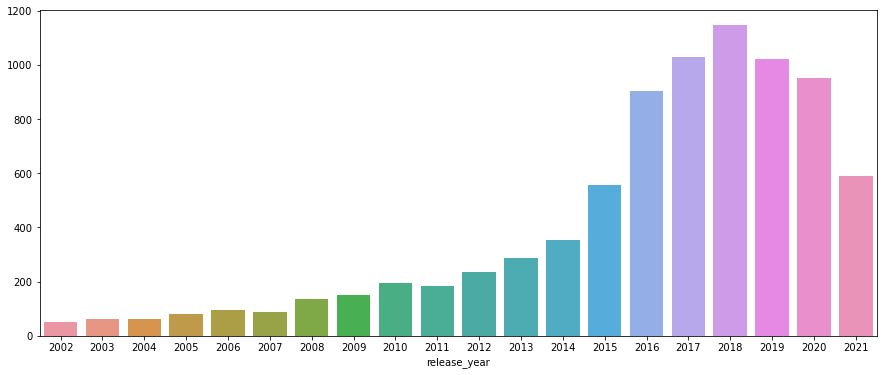

In [84]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x=year,y=no_of_movies)
plt.show()

#We can see an increasing trend in the number of movies released per year over the last 20 Years.Most of the movies on netflix were released between the years 2016-2020.


#Let us do the same for date_added to see the number of movies added per year on netflix

In [85]:
type(df['date_added'][0])

str

In [86]:
df['date_added']=pd.to_datetime(df['date_added'])

In [87]:
type(df['date_added'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [88]:
df['year_added']=df['date_added'].dt.year

In [89]:
df

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,year_added
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,Unknown Country,s1,Movie,2021-09-25,2020,PG-13,90 min,2021
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,2019
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,2019
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,2019
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,2019


In [90]:
year_add_count=df.groupby('year_added')['title'].nunique()
year_add_count

year_added
2008       2
2009       2
2010       1
2011      13
2012       3
2013      11
2014      24
2015      82
2016     432
2017    1185
2018    1650
2019    2012
2020    1877
2021    1498
Name: title, dtype: int64

In [91]:
no_of_movies_added=year_add_count.values[-20:]
no_of_movies_added

array([   2,    2,    1,   13,    3,   11,   24,   82,  432, 1185, 1650,
       2012, 1877, 1498], dtype=int64)

In [92]:
year_added=year_add_count.index[-20:]
year_added

Int64Index([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
            2019, 2020, 2021],
           dtype='int64', name='year_added')

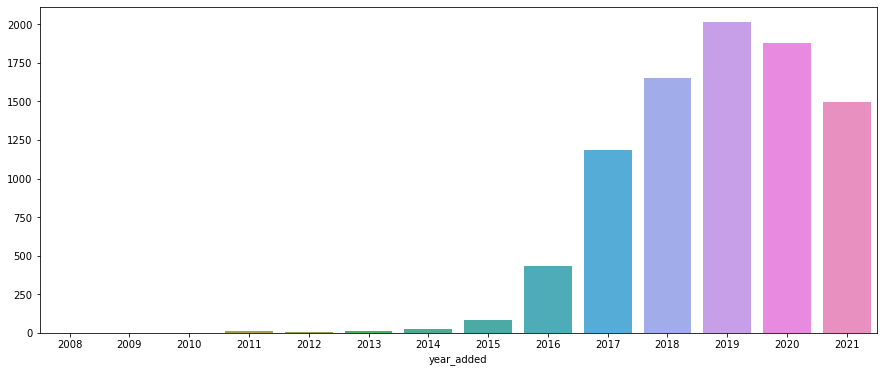

In [93]:
plt.figure(figsize=(15,6))
sns.barplot(data=df,x=year_added,y=no_of_movies_added)
plt.show()

Maximum number of movies were added on to Netflix between the years 2017-2021

#Now as we can see,duration has both min and season,so we will separate the movies from the tv shows

In [94]:
movies=df.loc[df['duration'].str.contains('min')]
movies

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,year_added
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,Unknown Country,s1,Movie,2021-09-25,2020,PG-13,90 min,2021
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91 min,2021
160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91 min,2021
161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91 min,2021
162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91 min,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,2019
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,2019
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,2019
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,2019


In [95]:
tvshows=df.loc[df['duration'].str.contains('Seasons')]
tvshows

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,year_added
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021
5,Blood & Water,Khosi Ngema,No_Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
201865,Zak Storm,Kyle Hebert,No_Director,Kids' TV,South Korea,s8798,TV Show,2018-09-13,2016,TV-Y7,3 Seasons,2018
201866,Zak Storm,Kyle Hebert,No_Director,Kids' TV,Indonesia,s8798,TV Show,2018-09-13,2016,TV-Y7,3 Seasons,2018
202006,Zombie Dumb,Unknown Actor,No_Director,Kids' TV,Unknown Country,s8804,TV Show,2019-07-01,2018,TV-Y7,2 Seasons,2019
202007,Zombie Dumb,Unknown Actor,No_Director,Korean TV Shows,Unknown Country,s8804,TV Show,2019-07-01,2018,TV-Y7,2 Seasons,2019


In [96]:
movies['duration']=movies['duration'].str.replace('min',"").astype(int)
movies

C:\Users\hp\AppData\Local\Temp\ipykernel_21712\2425476102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration']=movies['duration'].str.replace('min',"").astype(int)


,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,year_added
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,Unknown Country,s1,Movie,2021-09-25,2020,PG-13,90,2021
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91,2021
160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91,2021
161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91,2021
162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111,2019
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,2019-03-02,2015,TV-14,111,2019
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,2019-03-02,2015,TV-14,111,2019
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111,2019


In [97]:
#Number of movies
movies['title'].nunique()

6115

In [98]:
#Number of tv shows
tvshows['title'].nunique()

883

There are quite a lot number of movies as compared to TV Shows.(6131 Movies vs 883 TV Shows)

In [99]:
tvshows['duration']=tvshows['duration'].str.replace('Seasons',"").astype(int)
tvshows

C:\Users\hp\AppData\Local\Temp\ipykernel_21712\692544658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows['duration']=tvshows['duration'].str.replace('Seasons',"").astype(int)


,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,year_added
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021
5,Blood & Water,Khosi Ngema,No_Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
201865,Zak Storm,Kyle Hebert,No_Director,Kids' TV,South Korea,s8798,TV Show,2018-09-13,2016,TV-Y7,3,2018
201866,Zak Storm,Kyle Hebert,No_Director,Kids' TV,Indonesia,s8798,TV Show,2018-09-13,2016,TV-Y7,3,2018
202006,Zombie Dumb,Unknown Actor,No_Director,Kids' TV,Unknown Country,s8804,TV Show,2019-07-01,2018,TV-Y7,2,2019
202007,Zombie Dumb,Unknown Actor,No_Director,Korean TV Shows,Unknown Country,s8804,TV Show,2019-07-01,2018,TV-Y7,2,2019


In [100]:
movies['duration'].describe()

count    145917.000000
mean        106.839724
std          24.709594
min           3.000000
25%          93.000000
50%         104.000000
75%         119.000000
max         312.000000
Name: duration, dtype: float64

In [101]:
tvshows['duration'].describe()

count    21113.000000
mean         3.468195
std          2.219899
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         17.000000
Name: duration, dtype: float64

In [102]:
type(movies['date_added'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [103]:
movies['month_added']=movies['date_added'].dt.month_name()
movies

C:\Users\hp\AppData\Local\Temp\ipykernel_21712\1703260836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['month_added']=movies['date_added'].dt.month_name()


,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,year_added,month_added
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,Unknown Country,s1,Movie,2021-09-25,2020,PG-13,90,2021,September
159,My Little Pony: A New Generation,Vanessa Hudgens,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91,2021,September
160,My Little Pony: A New Generation,Vanessa Hudgens,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91,2021,September
161,My Little Pony: A New Generation,Kimiko Glenn,Robert Cullen,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91,2021,September
162,My Little Pony: A New Generation,Kimiko Glenn,José Luis Ucha,Children & Family Movies,Unknown Country,s7,Movie,2021-09-24,2021,PG,91,2021,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111,2019,March
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,2019-03-02,2015,TV-14,111,2019,March
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,2019-03-02,2015,TV-14,111,2019,March
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111,2019,March


In [104]:
#No of movies addded to netflix per month
movies.groupby('month_added').title.nunique().sort_values(ascending=False)

month_added
July         565
April        550
December     547
January      546
October      543
March        529
September    518
August       511
November     498
June         490
May          438
February     382
Name: title, dtype: int64

In [105]:
tvshows['month_added']=tvshows['date_added'].dt.month_name()
tvshows

C:\Users\hp\AppData\Local\Temp\ipykernel_21712\3959429824.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tvshows['month_added']=tvshows['date_added'].dt.month_name()


,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,year_added,month_added
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021,September
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021,September
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021,September
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021,September
5,Blood & Water,Khosi Ngema,No_Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2,2021,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
201865,Zak Storm,Kyle Hebert,No_Director,Kids' TV,South Korea,s8798,TV Show,2018-09-13,2016,TV-Y7,3,2018,September
201866,Zak Storm,Kyle Hebert,No_Director,Kids' TV,Indonesia,s8798,TV Show,2018-09-13,2016,TV-Y7,3,2018,September
202006,Zombie Dumb,Unknown Actor,No_Director,Kids' TV,Unknown Country,s8804,TV Show,2019-07-01,2018,TV-Y7,2,2019,July
202007,Zombie Dumb,Unknown Actor,No_Director,Korean TV Shows,Unknown Country,s8804,TV Show,2019-07-01,2018,TV-Y7,2,2019,July


In [106]:
tvshows.groupby('month_added').title.nunique().sort_values(ascending=False)

month_added
July         115
June          97
September     96
December      78
August        70
November      69
May           68
April         67
January       60
March         56
October       56
February      51
Name: title, dtype: int64

#Above result shows that  movies added in April,July and during Christmas,New Year i.e. December and January are maximum.
#Above result shows that  tv shows added in June,July and during Christmas,New Year i.e. December are maximum.

# Analysis of actors/directors of different types of shows/movies.

In [107]:
df

,title,Actors,Directors,Genre,country,show_id,type,date_added,release_year,rating,duration,year_added
0,Dick Johnson Is Dead,Unknown Actor,Kirsten Johnson,Documentaries,Unknown Country,s1,Movie,2021-09-25,2020,PG-13,90 min,2021
1,Blood & Water,Ama Qamata,No_Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021
2,Blood & Water,Ama Qamata,No_Director,TV Dramas,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021
3,Blood & Water,Ama Qamata,No_Director,TV Mysteries,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021
4,Blood & Water,Khosi Ngema,No_Director,International TV Shows,South Africa,s2,TV Show,2021-09-24,2021,TV-MA,2 Seasons,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
202060,Zubaan,Anita Shabdish,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,2019
202061,Zubaan,Anita Shabdish,Mozez Singh,Music & Musicals,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,2019
202062,Zubaan,Chittaranjan Tripathy,Mozez Singh,Dramas,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,2019
202063,Zubaan,Chittaranjan Tripathy,Mozez Singh,International Movies,India,s8807,Movie,2019-03-02,2015,TV-14,111 min,2019


In [108]:
df['Actors'].unique()

array(['Unknown Actor', 'Ama Qamata', 'Khosi Ngema', ..., 'Malkeet Rauni',
       'Anita Shabdish', 'Chittaranjan Tripathy'], dtype=object)

In [109]:
df['Actors'].nunique()

36440

In [110]:
df['Directors'].unique()

array(['Kirsten Johnson', 'No_Director', 'Julien Leclercq', ...,
       'Majid Al Ansari', 'Peter Hewitt', 'Mozez Singh'], dtype=object)

In [111]:
df['Directors'].nunique()

4994

In [112]:
#Best Actor-Director Pair(Rajesh Kava------Rajiv Chilaka )
df.groupby(['Actors','Directors'])['title'].nunique().sort_values(ascending=False)

Actors                Directors         
Unknown Actor         No_Director           348
Takahiro Sakurai      No_Director            24
Julie Tejwani         Rajiv Chilaka          19
Rajesh Kava           Rajiv Chilaka          19
Yuki Kaji             No_Director            18
                                           ... 
Hilda Dokubo          Tope Oshin              1
Hilda Koronel         Olivia M. Lamasan       1
Hildegard Schroedter  Lars Büchel             1
Hildegun Riise        Hans Petter Moland      1
Ṣọpẹ́ Dìrísù          Remi Weekes             1
Name: title, Length: 62741, dtype: int64

# Univariate Analysis

In [113]:
#number of distinct titles on the basis of genre
titles_per_genre=df_final1.groupby(['Genre']).agg({"title":"nunique"}).reset_index().sort_values('title',ascending=False)
titles_per_genre

,Genre,title
13,International Movies,2610
49,Dramas,1596
44,Comedies,1209
37,Action & Adventure,854
47,Documentaries,829
...,...,...
59,Romantic Movies,3
62,Spanish-Language TV Shows,2
70,TV Sci-Fi & Fantasy,1
55,LGBTQ Movies,1


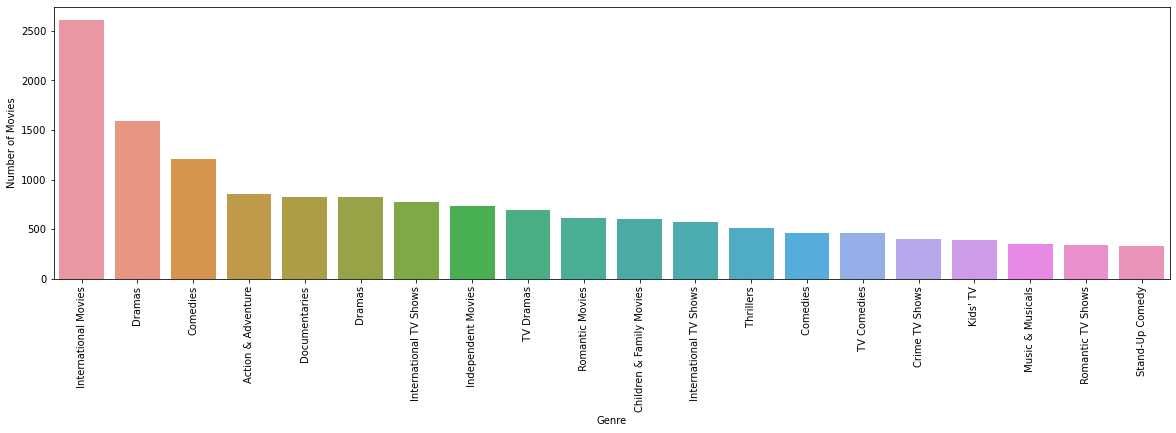

In [114]:
plt.figure(figsize=(20,5))
sns.barplot(data=titles_per_genre[:20],x='Genre',y='title')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies')
plt.show()

- This tells us the number of movies belonging to each genre.Top 5 Genres:
    - International Movies	
    - Dramas
    - Comedies
    - Action & Adventure	
    - Documentaries

In [115]:
#number of distinct titles on the basis of actor
titles_per_actor=df_final1.groupby(['Actors']).agg({"title":"nunique"}).reset_index().sort_values('title',ascending=False)
titles_per_actor.head(10)

,Actors,title
34214,Unknown Actor,821
2833,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
32591,Takahiro Sakurai,32
28974,Rupa Bhimani,31
25424,Om Puri,30
846,Akshay Kumar,30
35881,Yuki Kaji,29


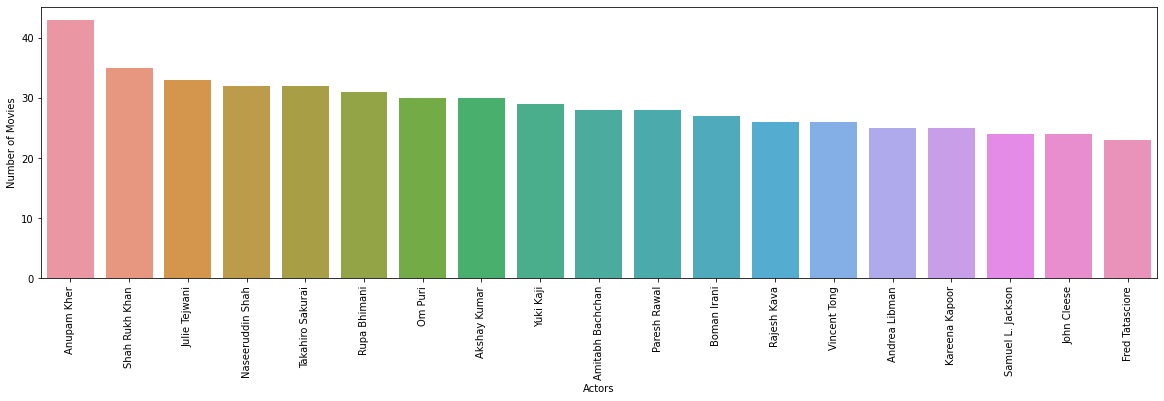

In [116]:
plt.figure(figsize=(20,5))
sns.barplot(data=titles_per_actor[1:20],x='Actors',y='title')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies')
plt.show()

- This tells us the number of movies done by each actor. Top 5 Actors:

    - Anupam Kher	
    - Shah Rukh Khan 
    - Julie Tejwani	 
    - Naseeruddin Shah	
    - Takahiro Sakurai	

In [117]:
#number of distinct titles on the basis of director
titles_per_director=df_final1.groupby(['Directors']).agg({"title":"nunique"}).reset_index().sort_values('title',ascending=False)
titles_per_director.head(10)

,Directors,title
3378,No_Director,2630
3750,Rajiv Chilaka,22
1906,Jan Suter,21
3801,Raúl Campos,19
4458,Suhas Kadav,16
2866,Marcus Raboy,16
1954,Jay Karas,15
755,Cathy Garcia-Molina,13
1951,Jay Chapman,12
2945,Martin Scorsese,12


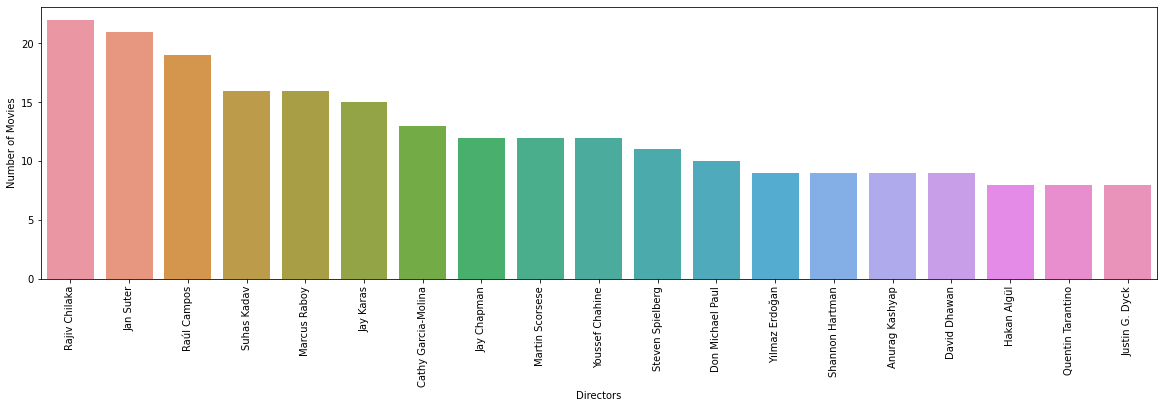

In [118]:
plt.figure(figsize=(20,5))
sns.barplot(data=titles_per_director[1:20],x='Directors',y='title')
plt.xticks(rotation=90)
plt.ylabel('Number of Movies')
plt.show()

- This tells us the number of movies done by each director. Top 5 directors:

     - Rajiv Chilaka		
     -Jan Suter
     -Raúl Campos		 
     -Suhas Kadav	
     -Marcus Raboy	

In [119]:
#number of distinct titles on the basis of type
titles_per_type=df_final1.groupby(['type']).agg({"title":"nunique"}).reset_index().sort_values('title',ascending=False)
titles_per_type.head(10)

,type,title
0,Movie,6115
1,TV Show,2676


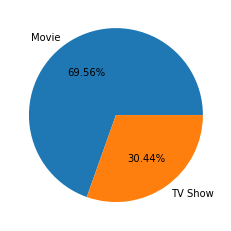

In [120]:
#No of Movies Vs Tv Shows
plt.pie(titles_per_type['title'],autopct='%.2f%%',labels=titles_per_type['type'])
plt.show()

In [121]:
#No of unique titles per release_year
titles_per_release_year=df.groupby('release_year').agg({'title':'nunique'}).reset_index().sort_values('title',ascending=False)
titles_per_release_year

,release_year,title
70,2018,1146
69,2017,1030
71,2019,1023
72,2020,953
68,2016,902
...,...,...
11,1959,1
13,1961,1
6,1947,1
18,1966,1


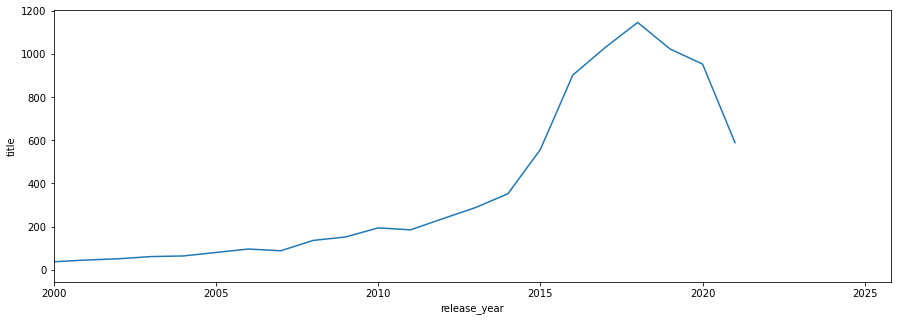

In [122]:
plt.figure(figsize=(15,5))
sns.lineplot(data=titles_per_release_year,x='release_year',y='title')
plt.xlim(left=2000)
plt.show()

This shows that after 2000,the number of movies released have increased till 2020.There is a decrease post that may be due to covid and content saturation.

In [ ]:
#No of unique titles per country
titles_per_country=df.groupby('country').agg({'title':'nunique'}).reset_index().sort_values('title',ascending=False)
titles_per_country.head(20)

In [ ]:
#We can see duplicates in countries which may be due to empty spaces.
df['country']=df['country'].str.strip()
df

In [ ]:
#This is sorted now.Lets remove the row where the country is unknown.
titles_per_country=df.groupby('country').agg({'title':'nunique'}).reset_index().sort_values('title',ascending=False)
titles_per_country=titles_per_country[~titles_per_country['country'].str.contains('Unknown Country')]
titles_per_country

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data=titles_per_country[:10],x='country',y='title')
plt.xlabel('Countries',fontsize=15)
plt.ylabel('No of Movies',fontsize=15)
plt.xticks(rotation=90,fontsize=12)
plt.show()

- Hence we can see the top 5 content creating countries on Netflix.Top 5 Countries:
    - United States
    - India
    - United Kingdom
    - Canada
    - France

In [ ]:
sns.boxplot(y=df['release_year'])

#The meadian year in which most of the movies were released are around 2017,2018,2019.Year before 2000 are outliers.

# Recommendations:
   #### The most popular Genres across the countries and in both TV Shows and Movies are Drama, Comedy and International TV             Shows/Movies, so content aligning to that is recommended.
   #### While creating content, take into consideration the popular actors/directors for that country. Also take into account the       director-actor combination which is highly recommended.
   #### Add movies for Indian Audience, it has been declining since 2018.US is leading here with ahuge margin.
   #### Netfix can add movies for UK,Canada,France,Japan as well as we can clearly see that US consumption leads by a huge margin.
   #### It is recommended to add more movies as per the festivals of respective countries.However,Christmas and New Years is            overall the best time as these festivals are celebrated in all the countries.